In [204]:
import pandas as pd
import seaborn as sns
import statistics as stats

In [205]:
dataset = pd.read_csv("../data/Churn.csv", sep=";")

dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [206]:
dataset.shape

(999, 12)

In [207]:
# Rename columns

dataset.columns = [
    "Id",
    "Score",
    "Estado",
    "Genero",
    "Idade",
    "Patrimonio",
    "Saldo",
    "Produtos",
    "TemCartCredito",
    "Ativo",
    "Salario",
    "Saiu",
]

In [208]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [209]:
StateGrouped = dataset.groupby(["Estado"]).size()

StateGrouped

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='Estado'>

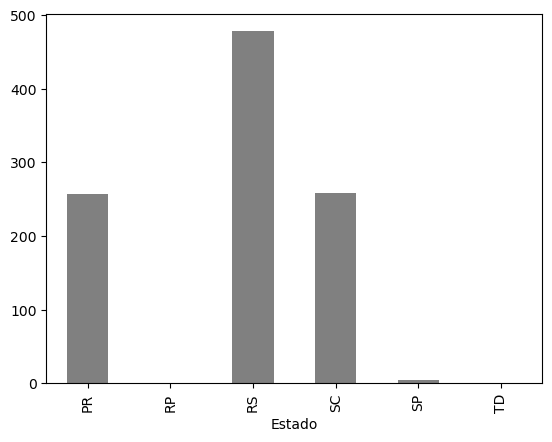

In [210]:
StateGrouped.plot.bar(color="gray")

In [211]:
GenderGrouped = dataset.groupby(["Genero"]).size()

GenderGrouped

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='Genero'>

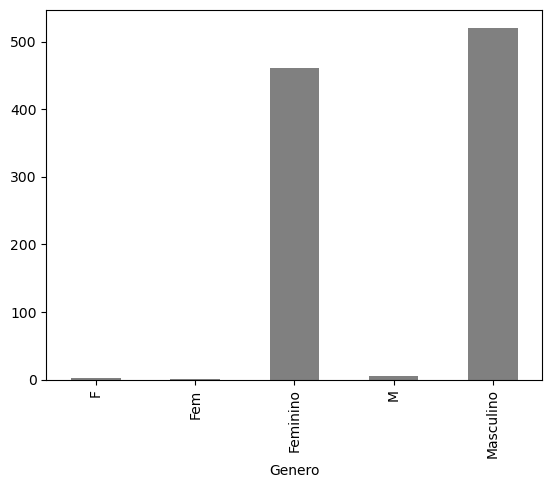

In [212]:
GenderGrouped.plot.bar(color="gray")

In [213]:
dataset["Score"].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

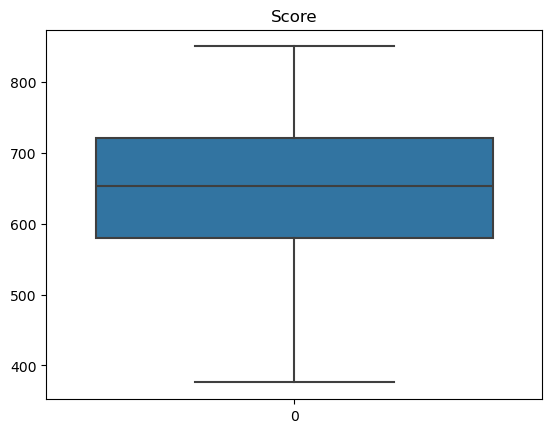

In [214]:
sns.boxplot(dataset["Score"]).set_title("Score")

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Score')

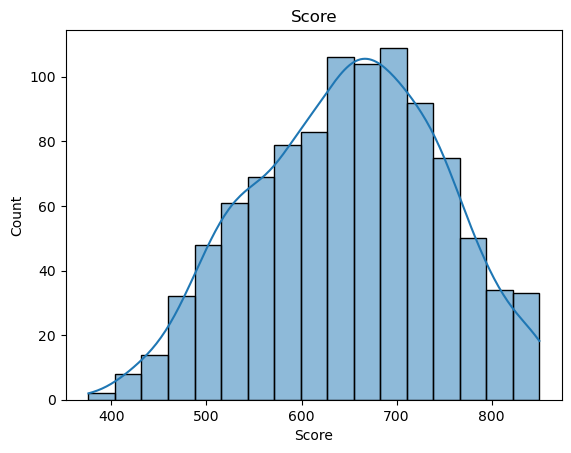

In [215]:
sns.histplot(dataset["Score"], kde=True).set_title("Score")

In [216]:
dataset["Idade"].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

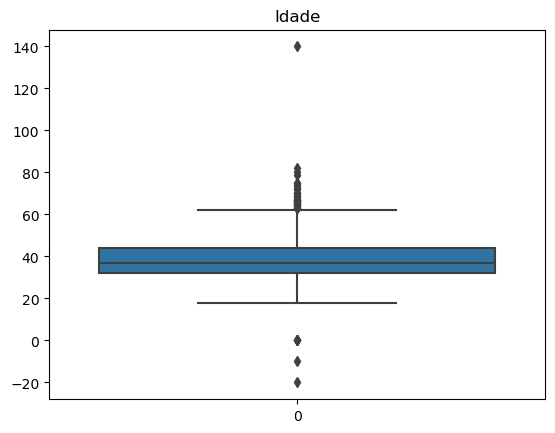

In [217]:
sns.boxplot(dataset["Idade"]).set_title("Idade")

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Idade')

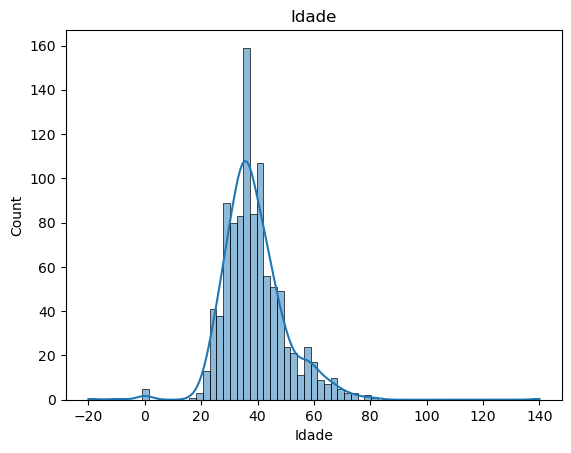

In [218]:
sns.histplot(dataset["Idade"], kde=True).set_title("Idade")

In [219]:
dataset["Saldo"].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

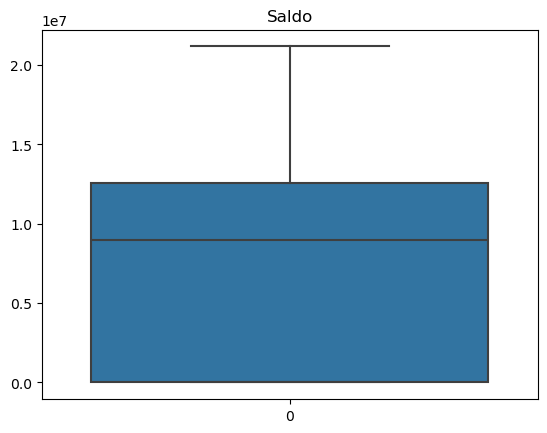

In [220]:
sns.boxplot(dataset["Saldo"]).set_title("Saldo")

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Saldo')

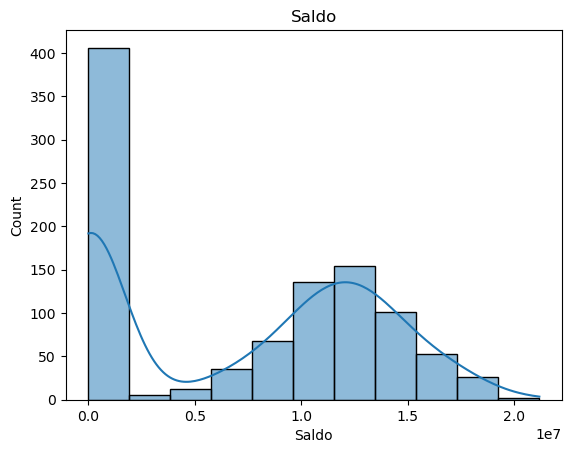

In [221]:
sns.histplot(dataset["Saldo"], kde=True).set_title("Saldo")

In [222]:
dataset["Salario"].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'Salario')

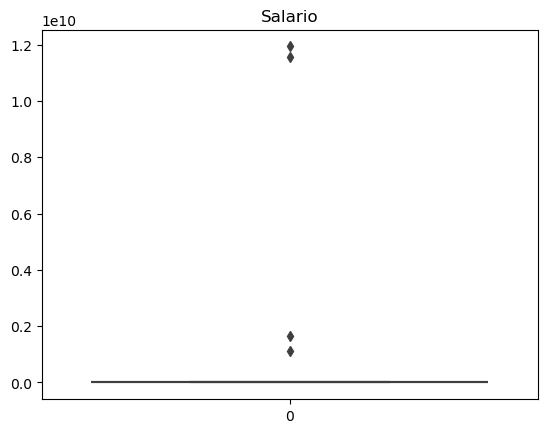

In [223]:
sns.boxplot(dataset["Salario"]).set_title("Salario")

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Salario')

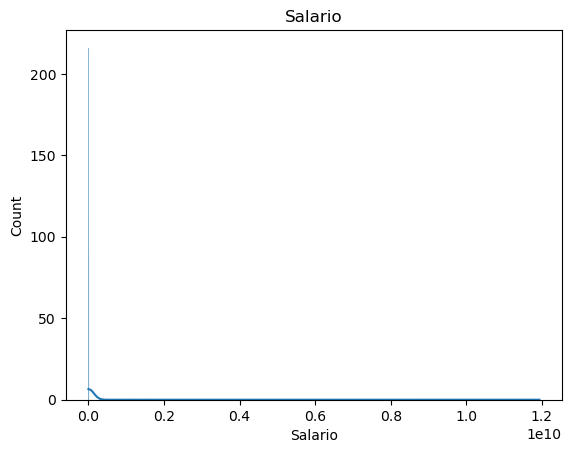

In [224]:
sns.histplot(dataset["Salario"], kde=True).set_title("Salario")

In [225]:
# Count NaN values
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [226]:
SalaryMedian = stats.median(dataset["Salario"])
SalaryMedian

70518.0

In [227]:
dataset["Salario"].fillna(SalaryMedian, inplace=True)

dataset["Salario"].isnull().sum()

0

In [228]:
dataset["Genero"].isnull().sum()

8

In [229]:
# Fill NA gender with the most frequent value
GenderMode = stats.mode(dataset["Genero"])

dataset["Genero"].fillna(GenderMode, inplace=True)

dataset["Genero"].isnull().sum()

0

In [230]:
dataset.groupby(["Genero"]).size()

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    529
dtype: int64

In [231]:
# Standardize the gender column
dataset.loc[dataset["Genero"] == "M", "Genero"] = "Masculino"
dataset.loc[dataset["Genero"].isin(["Fem", "F"]), "Genero"] = "Feminino"

dataset.groupby(["Genero"]).size()

Genero
Feminino     464
Masculino    535
dtype: int64

In [232]:
dataset.loc[(dataset["Idade"] < 0) | (dataset["Idade"] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [233]:
AgeMedian = stats.median(dataset["Idade"])

print(AgeMedian)

dataset.loc[(dataset["Idade"] < 0) | (dataset["Idade"] > 120), "Idade"] = AgeMedian

dataset.loc[(dataset["Idade"] < 0) | (dataset["Idade"] > 120)]

37


,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [234]:
# Duplicate Data

dataset[dataset.duplicated(["Id"], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [235]:
dataset.drop_duplicates(subset="Id", keep="first", inplace=True)

dataset[dataset.duplicated(["Id"], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [236]:
dataset.groupby(["Estado"]).size()

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [237]:
dataset.loc[dataset["Estado"].isin(["RP", "SP", "TD"]), "Estado"] = "RS"

dataset.groupby(["Estado"]).size()

Estado
PR    257
RS    483
SC    258
dtype: int64

In [238]:
# Deal with outliers in Salary

salarySd = stats.stdev(dataset["Salario"])

salarySd

528988918.4679201

In [239]:
dataset.loc[dataset["Salario"] >= 2 * salarySd]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [240]:
SalaryMedian = stats.median(dataset["Salario"])

SalaryMedian

8637195.5

In [241]:
dataset.loc[dataset["Salario"] >= 2 * salarySd, "Salario"] = SalaryMedian

dataset.loc[dataset["Salario"] >= 2 * salarySd]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [242]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [243]:
dataset.shape

(998, 12)

In [244]:
dataset["Idade"].describe()

count    998.000000
mean      38.908818
std       10.676642
min        0.000000
25%       32.000000
50%       37.000000
75%       44.000000
max       82.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

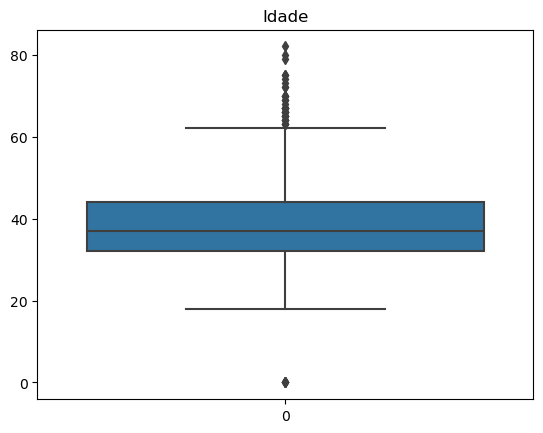

In [248]:
sns.boxplot(dataset["Idade"]).set_title("Idade")

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Idade')

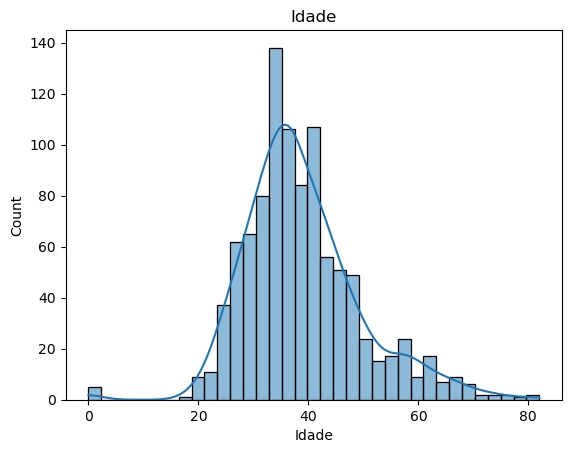

In [245]:
sns.histplot(dataset["Idade"], kde=True).set_title("Idade")

Text(0.5, 1.0, 'Salario')

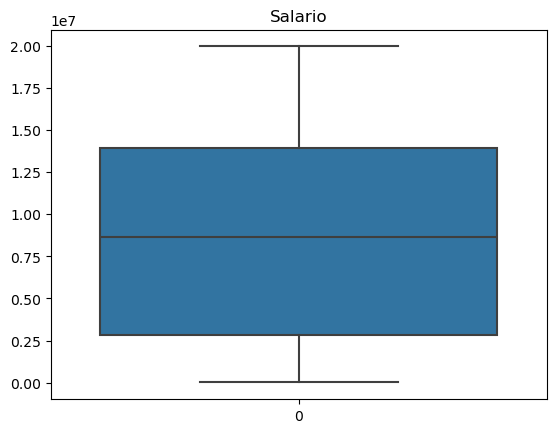

In [246]:
sns.boxplot(dataset["Salario"]).set_title("Salario")

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Salario')

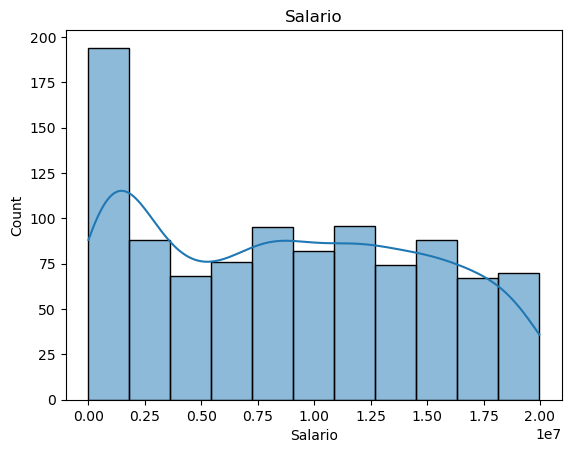

In [247]:
sns.histplot(dataset["Salario"], kde=True).set_title("Salario")